In [5]:
import sys
sys.path.insert(0, '/Users/Laurentia/PmagPy')
import pmag, ipmag, ipmagplotlib
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
def pole_sample(Plon, Plat, A95):
    plon_sample = random.uniform(0.0, 359.9)
    plat_sample = 90 - random.uniform(0.0, A95)
    plon_rot,plat_rot=pmag.dodirot(plon_sample,plat_sample,Plon,Plat)
    return plon_rot,plat_rot

In [22]:
samples = 20

Plon = 201.6
Plat = 42.5
A95 = 3.7

plon_samples = []
plat_samples = []

for n in range(0,samples):
    plon_rot,plat_rot = pole_sample(Plon, Plat, A95)
    plon_samples.append(plon_rot)
    plat_samples.append(plat_rot)

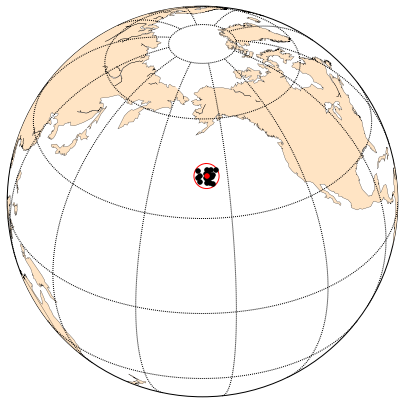

In [24]:
from mpl_toolkits.basemap import Basemap

m = Basemap(projection='ortho',lat_0=35,lon_0=200,resolution='c',area_thresh=50000)
plt.figure(figsize=(7, 7))
m.drawcoastlines(linewidth=0.25)
m.fillcontinents(color='bisque',zorder=1)
m.drawmeridians(np.arange(0,360,30))
m.drawparallels(np.arange(-90,90,30))

ipmag.plot_vgp(m,plon_samples,plat_samples)
               
ipmag.plot_pole(m,Plon,Plat,A95,color='red')